In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [210]:
bookings = pd.read_csv("fact_aggregated_bookings.csv")
df=pd.read_csv('final_bookings_cleaned.csv')
hotels = pd.read_csv("dim_hotels.csv")

In [57]:
cat_room=bookings.groupby('room_category').agg({'successful_bookings':'sum','capacity':'sum'}).reset_index()
cat_room


,room_category,successful_bookings,capacity
0,RT1,38446,66424
1,RT2,49505,85928
2,RT3,30566,53084
3,RT4,16073,27140


In [58]:
leakage_by_room=df.groupby('room_category').agg({'revenue_generated' : 'sum', 'revenue_realized' : 'sum'}).reset_index()
leakage_by_room

,room_category,revenue_generated,revenue_realized
0,RT1,348313485,296650614
1,RT2,631263690,536852790
2,RT3,519970320,442533312
3,RT4,423106820,361121144


In [59]:
cat_room['RevPAR_generated']=leakage_by_room['revenue_generated']/cat_room['capacity']
cat_room['RevPAR_realized']=leakage_by_room['revenue_realized']/cat_room['capacity']
cat_room

,room_category,successful_bookings,capacity,RevPAR_generated,RevPAR_realized
0,RT1,38446,66424,5243.789669,4466.015506
1,RT2,49505,85928,7346.425961,6247.704939
2,RT3,30566,53084,9795.236229,8336.472609
3,RT4,16073,27140,15589.787030,13305.863817


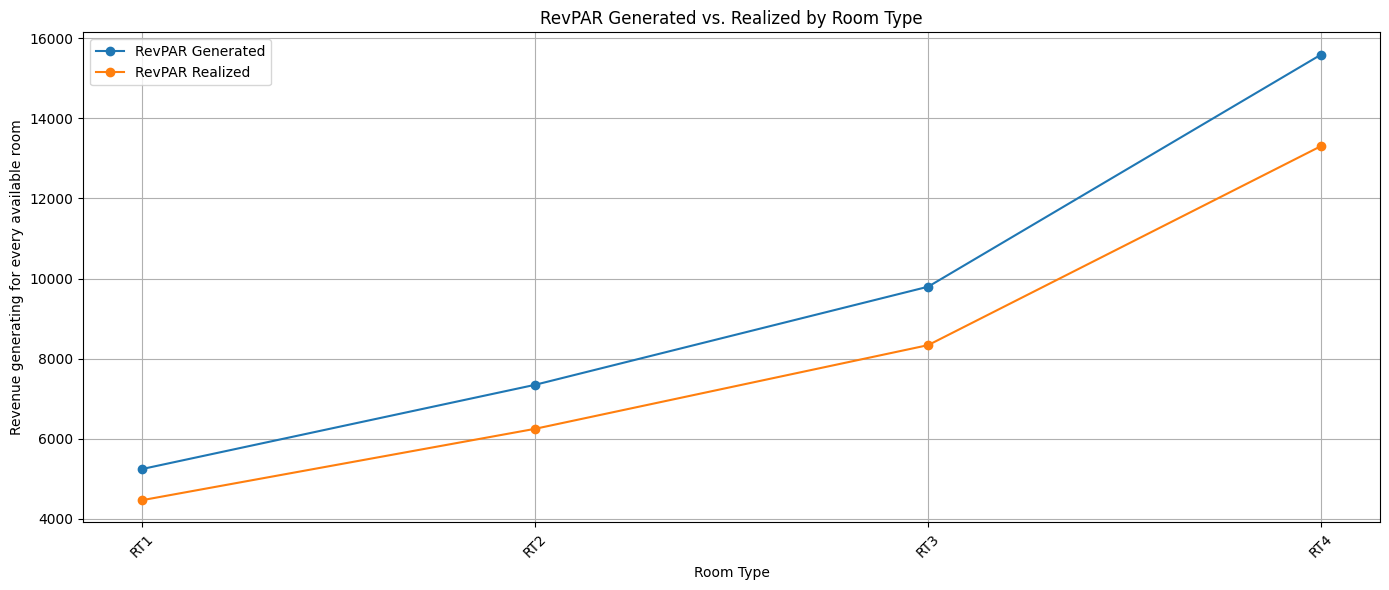

In [94]:
plt.figure(figsize=(14, 6))
plt.plot(cat_room['room_category'], cat_room['RevPAR_generated'], label='RevPAR Generated', marker='o')
plt.plot(cat_room['room_category'], cat_room['RevPAR_realized'], label='RevPAR Realized', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Room Type')
plt.ylabel('Revenue generating for every available room')
plt.title('RevPAR Generated vs. Realized by Room Type')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
cat_room['ADR_generated']=leakage_by_room['revenue_generated']/cat_room['successful_bookings']
cat_room['ADR_realized']=leakage_by_room['revenue_realized']/cat_room['successful_bookings']
cat_room

,room_category,successful_bookings,capacity,RevPAR_generated,RevPAR_realized,ADR_generated,ADR_realized
0,RT1,38446,66424,5243.789669,4466.015506,9059.810774,7716.033241
1,RT2,49505,85928,7346.425961,6247.704939,12751.513786,10844.415514
2,RT3,30566,53084,9795.236229,8336.472609,17011.395668,14477.959563
3,RT4,16073,27140,15589.787030,13305.863817,26324.072668,22467.563243


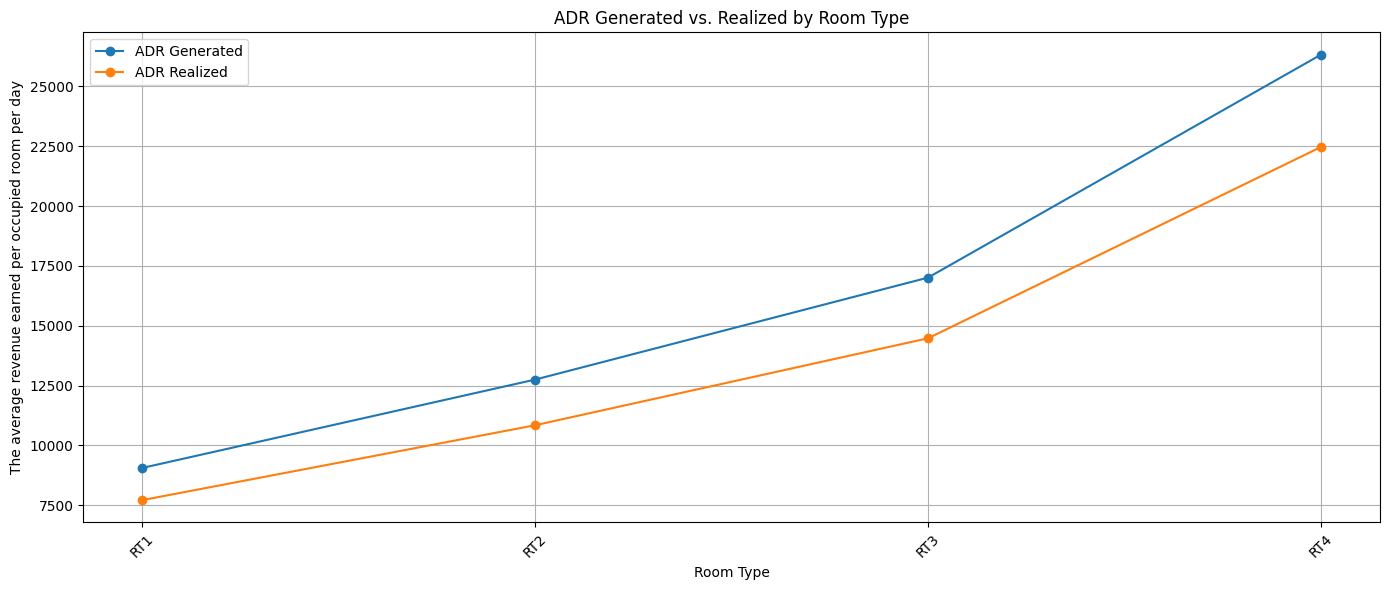

In [95]:
plt.figure(figsize=(14, 6))
plt.plot(cat_room['room_category'], cat_room['ADR_generated'], label='ADR Generated', marker='o')
plt.plot(cat_room['room_category'], cat_room['ADR_realized'], label='ADR Realized', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Room Type')
plt.ylabel('The average revenue earned per occupied room per day')
plt.title('ADR Generated vs. Realized by Room Type')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
cat_room['Occupancy Rate']=(cat_room['successful_bookings']/cat_room['capacity'])*100
cat_room

,room_category,successful_bookings,capacity,RevPAR_generated,RevPAR_realized,ADR_generated,ADR_realized,Occupancy Rate
0,RT1,38446,66424,5243.789669,4466.015506,9059.810774,7716.033241,57.879682
1,RT2,49505,85928,7346.425961,6247.704939,12751.513786,10844.415514,57.612187
2,RT3,30566,53084,9795.236229,8336.472609,17011.395668,14477.959563,57.580439
3,RT4,16073,27140,15589.787030,13305.863817,26324.072668,22467.563243,59.222550


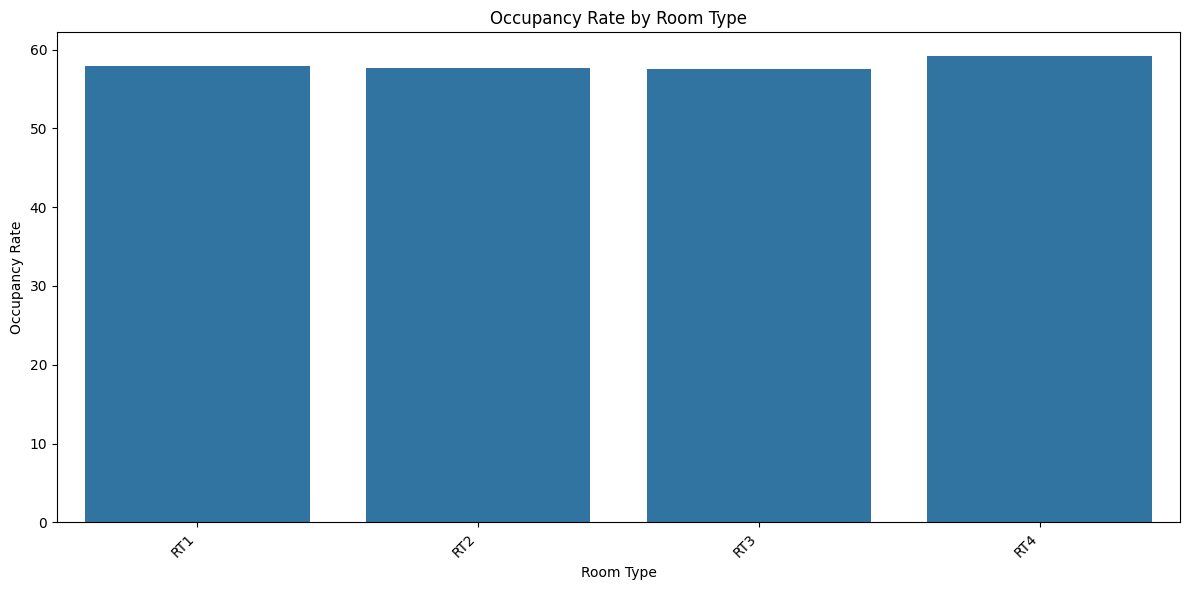

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(data=cat_room, x='room_category', y='Occupancy Rate')
plt.xticks(rotation=45, ha='right')
plt.title('Occupancy Rate by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Occupancy Rate')
plt.tight_layout()
plt.show()

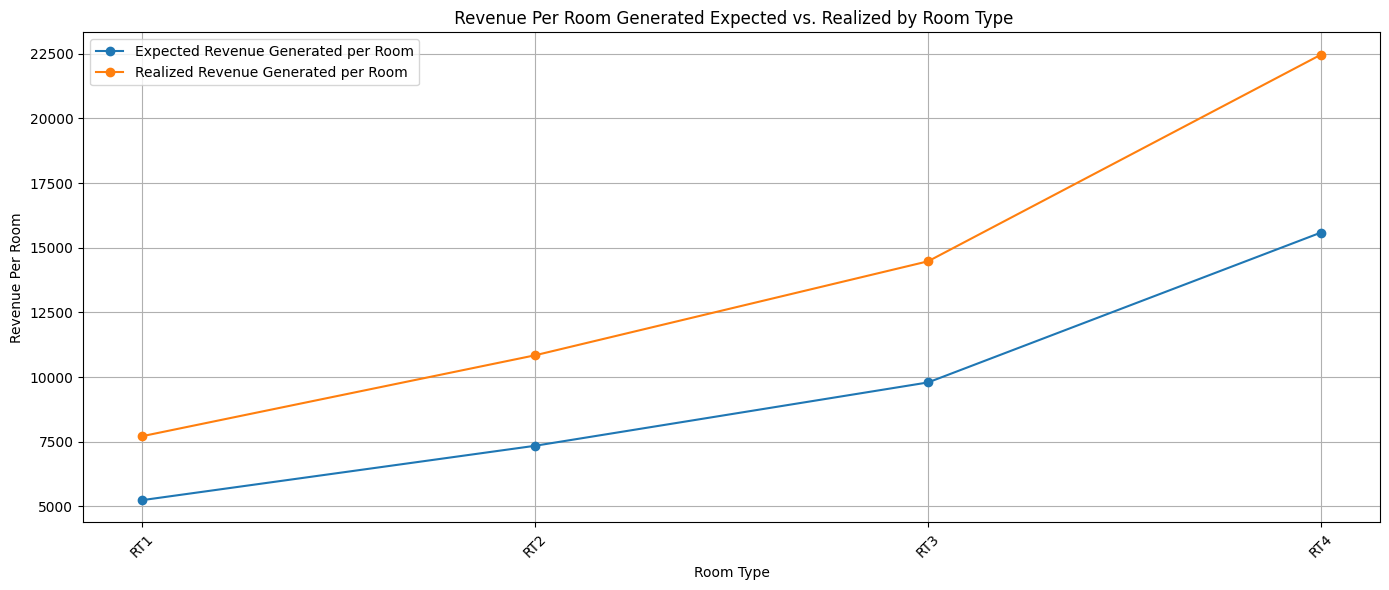

In [45]:
plt.figure(figsize=(14, 6))
plt.plot(cat_room['room_category'], cat_room['RevPAR_generated'], label='Expected Revenue Generated per Room', marker='o')
plt.plot(cat_room['room_category'], cat_room['ADR_realized'], label='Realized Revenue Generated per Room', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Room Type')
plt.ylabel('Revenue Per Room')
plt.title(' Revenue Per Room Generated Expected vs. Realized by Room Type')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
prop_id=bookings.groupby('property_id').agg({'successful_bookings':'sum','capacity':'sum'}).reset_index()
prop_id

,property_id,successful_bookings,capacity
0,16558,3153,4784
1,16559,7338,11132
2,16560,4693,8740
3,16561,4418,6716
4,16562,4820,9016
5,16563,7147,10764
6,17558,5036,9384
7,17559,6142,9292
8,17560,6013,11316
9,17561,5183,7820


In [50]:
prop_id = prop_id.merge(hotels, on='property_id', how='left')
prop_id

,property_id,successful_bookings,capacity,property_name,category,city
0,16558,3153,4784,Atliq Grands,Luxury,Delhi
1,16559,7338,11132,Atliq Exotica,Luxury,Mumbai
2,16560,4693,8740,Atliq City,Business,Delhi
3,16561,4418,6716,Atliq Blu,Luxury,Delhi
4,16562,4820,9016,Atliq Bay,Luxury,Delhi
5,16563,7147,10764,Atliq Palace,Business,Delhi
6,17558,5036,9384,Atliq Grands,Luxury,Mumbai
7,17559,6142,9292,Atliq Exotica,Luxury,Mumbai
8,17560,6013,11316,Atliq City,Business,Mumbai
9,17561,5183,7820,Atliq Blu,Luxury,Mumbai


In [52]:
prop_id2=df.groupby('property_id').agg({'revenue_generated' : 'sum', 'revenue_realized' : 'sum'}).reset_index()
prop_id2['revenue_leaked']=prop_id2['revenue_generated']-prop_id2['revenue_realized']
prop_id2

,property_id,revenue_generated,revenue_realized,revenue_leaked
0,16558,39941580,34085856,5855724
1,16559,131670440,112379588,19290852
2,16560,62580980,53594324,8986656
3,16561,64941660,54957588,9984072
4,16562,62781880,53613910,9167970
5,16563,102291630,86647596,15644034
6,17558,83748375,70874241,12874134
7,17559,103733915,88970741,14763174
8,17560,101270785,85873885,15396900
9,17561,82438780,70243456,12195324


In [66]:
prop_id['RevPAR_generated']=prop_id2['revenue_generated']/prop_id['capacity']
prop_id['RevPAR_realized']=prop_id2['revenue_realized']/prop_id['capacity']
prop_id['ADR_generated']=prop_id2['revenue_generated']/prop_id['successful_bookings']
prop_id['ADR_realized']=prop_id2['revenue_realized']/prop_id['successful_bookings']
prop_id['Occupancy Rate']=(prop_id['successful_bookings']/prop_id['capacity'])*100
prop_id

,property_id,successful_bookings,capacity,property_name,category,city,RevPAR_generated,RevPAR_realized,ADR_generated,ADR_realized,Occupancy Rate
0,16558,3153,4784,Atliq Grands,Luxury,Delhi,8348.992475,7124.969900,12667.802093,10810.610847,65.907191
1,16559,7338,11132,Atliq Exotica,Luxury,Mumbai,11828.102767,10095.183974,17943.641319,15314.743527,65.918074
2,16560,4693,8740,Atliq City,Business,Delhi,7160.295195,6132.073684,13334.962710,11420.056254,53.695652
3,16561,4418,6716,Atliq Blu,Luxury,Delhi,9669.693270,8183.083383,14699.334541,12439.472159,65.783204
4,16562,4820,9016,Atliq Bay,Luxury,Delhi,6963.385093,5946.529503,13025.286307,11123.217842,53.460515
5,16563,7147,10764,Atliq Palace,Business,Delhi,9503.124303,8049.758082,14312.526934,12123.631734,66.397250
6,17558,5036,9384,Atliq Grands,Luxury,Mumbai,8924.592391,7552.668478,16629.939436,14073.518864,53.665814
7,17559,6142,9292,Atliq Exotica,Luxury,Mumbai,11163.787667,9574.982889,16889.273038,14485.630251,66.099871
8,17560,6013,11316,Atliq City,Business,Mumbai,8949.344733,7588.713768,16841.973225,14281.371196,53.137151
9,17561,5183,7820,Atliq Blu,Luxury,Mumbai,10542.043478,8982.539130,15905.610650,13552.663708,66.278772


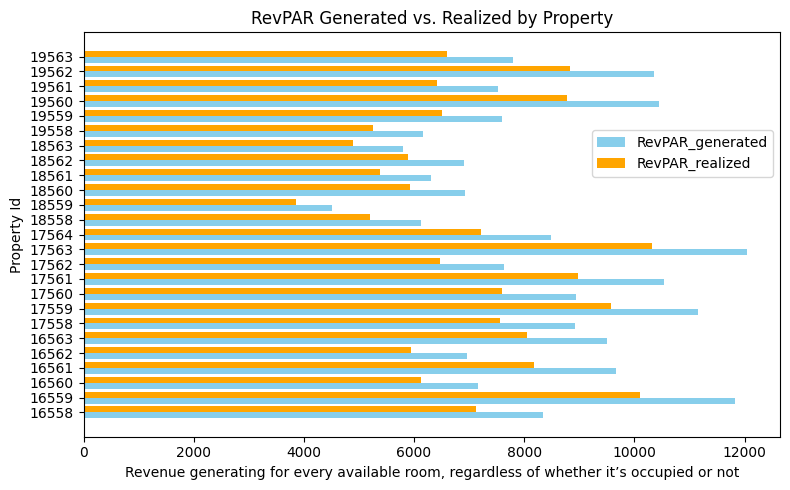

In [92]:
y = np.arange(len(prop_id['property_id']))  
bar_height = 0.40  
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(y - bar_height/2,prop_id['RevPAR_generated'] , height=bar_height, label='RevPAR_generated', color='skyblue')
ax.barh(y + bar_height/2, prop_id['RevPAR_realized'], height=bar_height, label='RevPAR_realized', color='orange')

# Set y-ticks and labels
ax.set_yticks(y)
ax.set_yticklabels(prop_id['property_id'])

# Add labels, title, and legend
ax.set_xlabel('Revenue generating for every available room, regardless of whether it’s occupied or not')
ax.set_ylabel('Property Id')
ax.set_title('RevPAR Generated vs. Realized by Property')
ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1, 0.7))
plt.tight_layout()
plt.show()


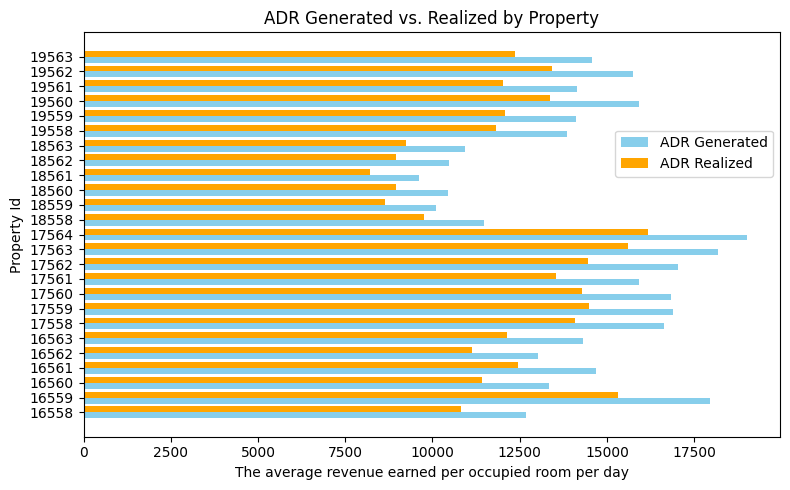

In [90]:
y = np.arange(len(prop_id['property_id']))  
bar_height = 0.40  
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(y - bar_height/2,prop_id['ADR_generated'] , height=bar_height, label='ADR Generated', color='skyblue')
ax.barh(y + bar_height/2, prop_id['ADR_realized'], height=bar_height, label='ADR Realized', color='orange')

# Set y-ticks and labels
ax.set_yticks(y)
ax.set_yticklabels(prop_id['property_id'])

# Add labels, title, and legend
ax.set_xlabel('The average revenue earned per occupied room per day')
ax.set_ylabel('Property Id')
ax.set_title('ADR Generated vs. Realized by Property')
ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1, 0.7))
plt.tight_layout()
plt.show()

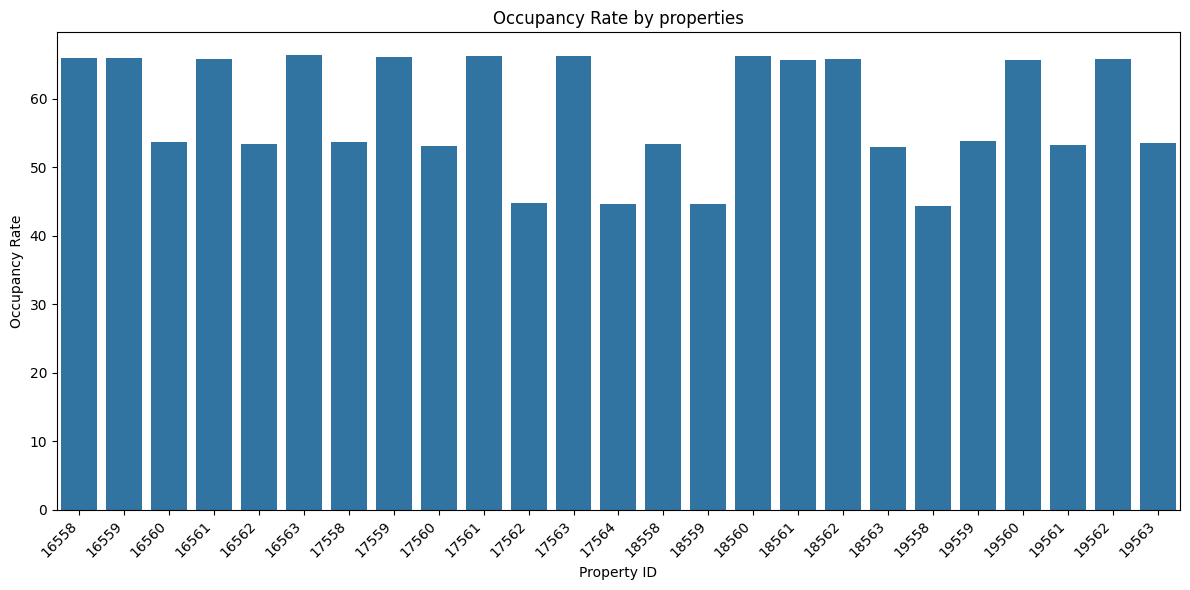

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(data=prop_id, x='property_id', y='Occupancy Rate')
plt.xticks(rotation=45, ha='right')
plt.title('Occupancy Rate by properties')
plt.xlabel('Property ID')
plt.ylabel('Occupancy Rate')
plt.tight_layout()
plt.show()

In [138]:
group_col = 'booking_platform'  
booking_partners = df.groupby(group_col)['booking_status'].value_counts().unstack().reset_index()
booking_partners['Conversion Rate']=(booking_partners['Checked Out']/(booking_partners['Checked Out']+booking_partners['No Show']+booking_partners['Cancelled']))*100
booking_partners

booking_status,booking_platform,Cancelled,Checked Out,No Show,Conversion Rate
0,direct offline,1575,4541,347,70.261488
1,direct online,3201,9040,612,70.333774
2,journey,1907,5468,360,70.691661
3,logtrip,3433,9995,721,70.641035
4,makeyourtrip,6417,18036,1289,70.064486
5,others,13116,36965,2656,70.093104
6,tripster,2285,6431,479,69.940185


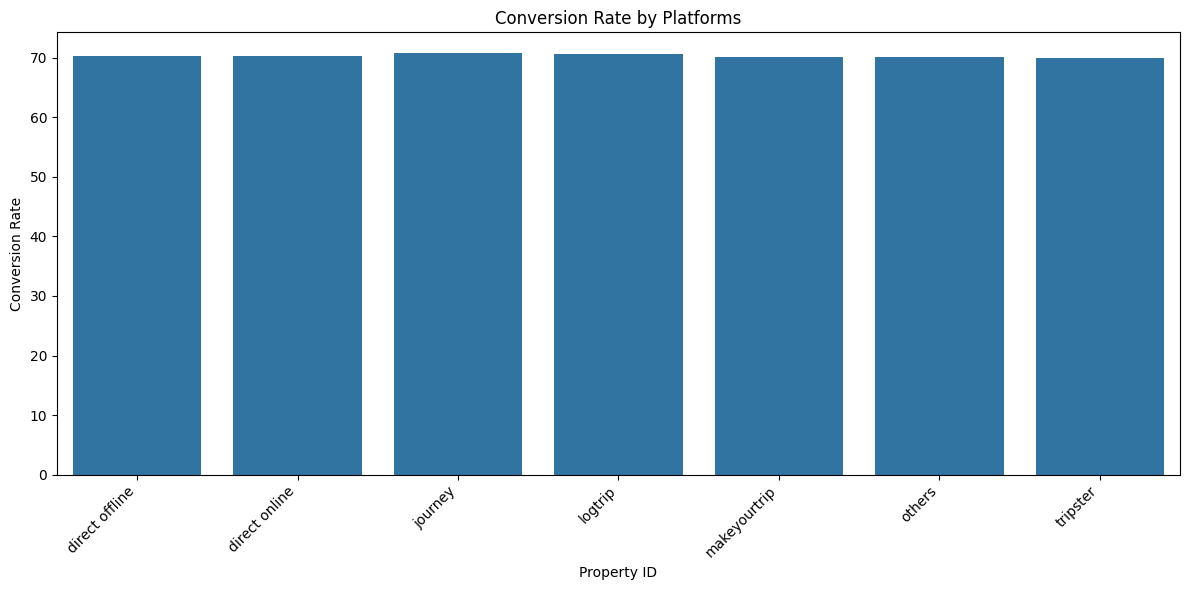

In [143]:
plt.figure(figsize=(12, 6))
sns.barplot(data=booking_partners, x='booking_platform', y='Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.title('Conversion Rate by Platforms')
plt.xlabel('Platforms')
plt.ylabel('Conversion Rate')
plt.tight_layout()
plt.show()

In [151]:
booking_partners['Conversion Rate']=(booking_partners['Checked Out']/(booking_partners['Checked Out']+booking_partners['No Show']+booking_partners['Cancelled']))*100
booking_partners2=df.groupby(group_col).agg({'revenue_generated':'sum','revenue_realized':'sum','no_guests':'sum'}).reset_index()
#booking_partners2['revenue_leaked']=booking_partners2['revenue_generated']-booking_partners2['revenue_realized']
booking_partners2['Avg Revenue per Booking']=booking_partners2['revenue_realized']/booking_partners['Checked Out']
booking_partners2['Avg Revenue per Guest']=booking_partners2['revenue_realized']/booking_partners2['no_guests']
booking_partners2


,booking_platform,revenue_generated,revenue_realized,no_guests,Avg Revenue per Booking,Avg Revenue per Guest
0,direct offline,97091425,82801660,13102,18234.234750,6319.772554
1,direct online,190817760,162425889,26178,17967.465597,6204.671442
2,journey,115292435,98036498,15727,17929.132772,6233.642653
3,logtrip,210456200,179888414,28638,17997.840320,6281.458691
4,makeyourtrip,384211545,326297685,52352,18091.466234,6232.764460
5,others,786756370,670153069,107084,18129.394535,6258.199815
6,tripster,138028580,117554645,18994,18279.372570,6189.041013


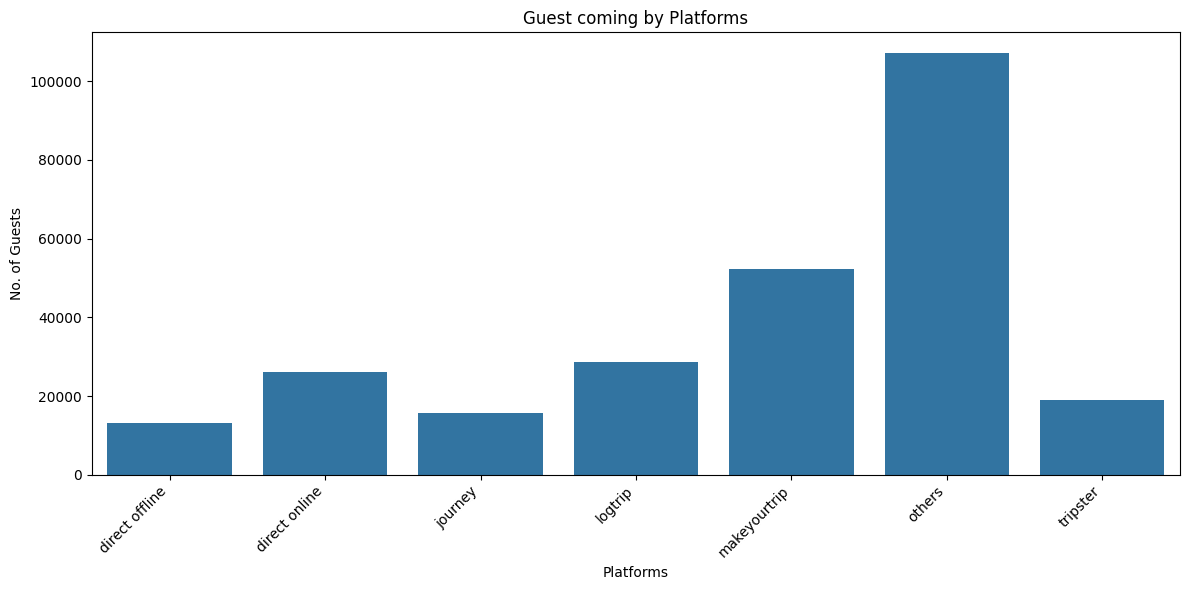

In [144]:
plt.figure(figsize=(12, 6))
sns.barplot(data=booking_partners2, x='booking_platform', y='no_guests')
plt.xticks(rotation=45, ha='right')
plt.title('Guest coming by Platforms')
plt.xlabel('Platforms')
plt.ylabel('No. of Guests')
plt.tight_layout()
plt.show()

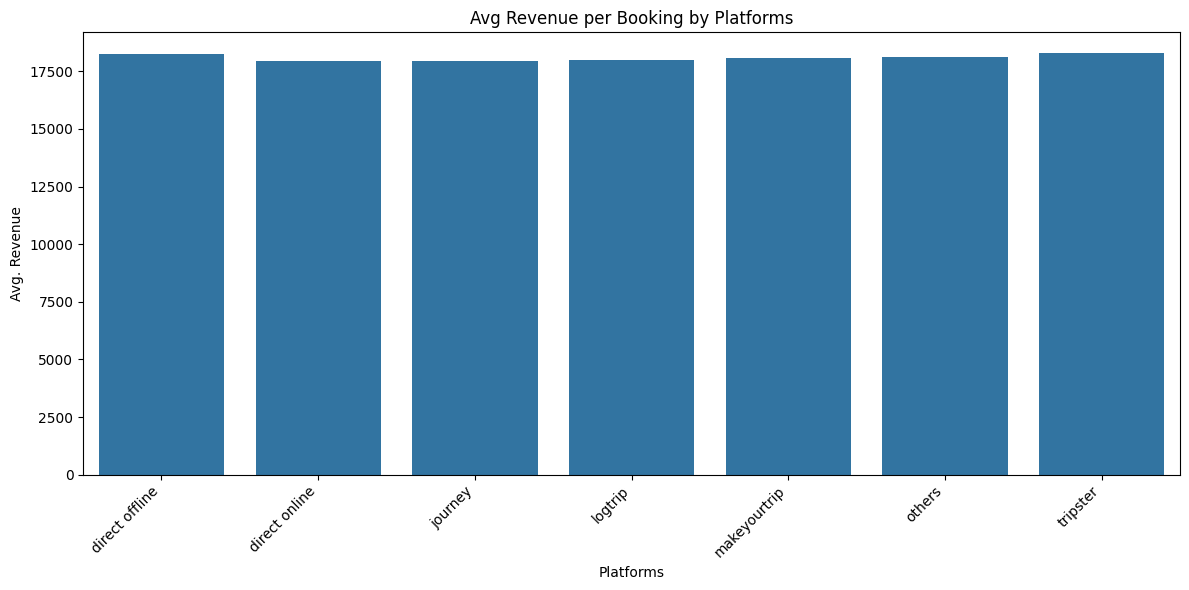

In [145]:
plt.figure(figsize=(12, 6))
sns.barplot(data=booking_partners2, x='booking_platform', y='Avg Revenue per Booking')
plt.xticks(rotation=45, ha='right')
plt.title('Avg Revenue per Booking by Platforms')
plt.xlabel('Platforms')
plt.ylabel('Avg. Revenue')
plt.tight_layout()
plt.show()

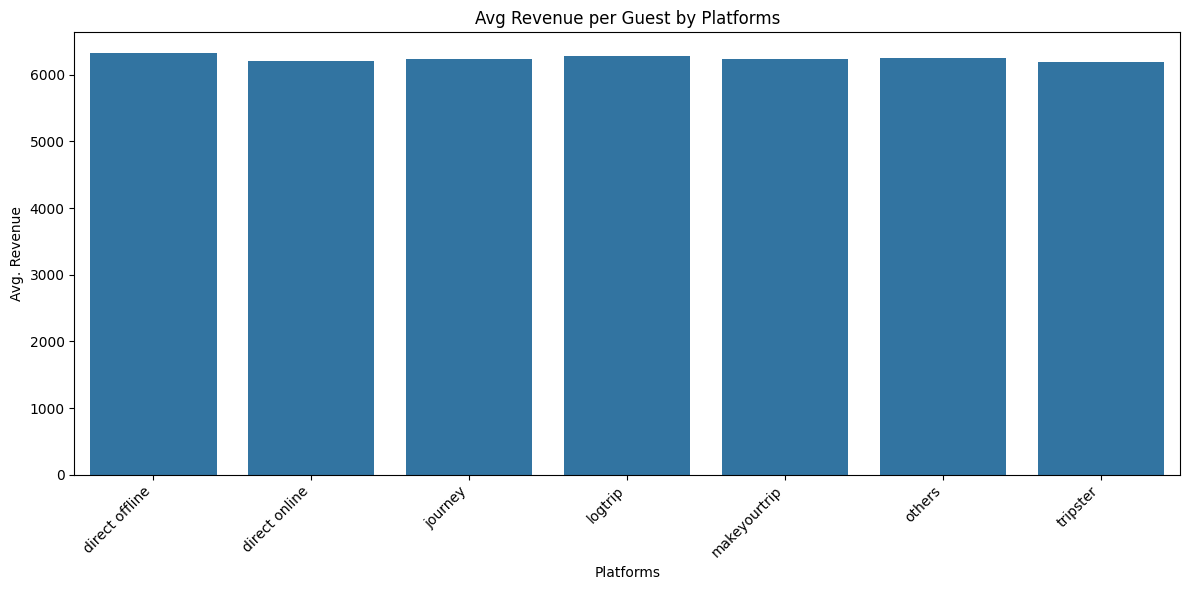

In [152]:
plt.figure(figsize=(12, 6))
sns.barplot(data=booking_partners2, x='booking_platform', y='Avg Revenue per Guest')
plt.xticks(rotation=45, ha='right')
plt.title('Avg Revenue per Guest by Platforms')
plt.xlabel('Platforms')
plt.ylabel('Avg. Revenue')
plt.tight_layout()
plt.show()

In [216]:
df['check_in_date'] = pd.to_datetime(df['check_in_date'])
df['checkout_date'] = pd.to_datetime(df['checkout_date'])
df['nights'] = (df['checkout_date'] - df['check_in_date']).dt.days
prop_id4=df.groupby('property_id')['nights'].sum().reset_index()
prop_id4= prop_id4.merge(prop_id, on='property_id', how='left')
prop_id4['Avg_night_stay']=prop_id4['nights']/prop_id4['successful_bookings']
prop_id4


,property_id,nights,successful_bookings,capacity,property_name,category,city,RevPAR_generated,RevPAR_realized,ADR_generated,ADR_realized,Occupancy Rate,Avg_night_stay
0,16558,8248,3153,4784,Atliq Grands,Luxury,Delhi,8348.992475,7124.969900,12667.802093,10810.610847,65.907191,2.615921
1,16559,19025,7338,11132,Atliq Exotica,Luxury,Mumbai,11828.102767,10095.183974,17943.641319,15314.743527,65.918074,2.592668
2,16560,8034,4693,8740,Atliq City,Business,Delhi,7160.295195,6132.073684,13334.962710,11420.056254,53.695652,1.711911
3,16561,11601,4418,6716,Atliq Blu,Luxury,Delhi,9669.693270,8183.083383,14699.334541,12439.472159,65.783204,2.625849
4,16562,12531,4820,9016,Atliq Bay,Luxury,Delhi,6963.385093,5946.529503,13025.286307,11123.217842,53.460515,2.599793
5,16563,12251,7147,10764,Atliq Palace,Business,Delhi,9503.124303,8049.758082,14312.526934,12123.631734,66.397250,1.714146
6,17558,13249,5036,9384,Atliq Grands,Luxury,Mumbai,8924.592391,7552.668478,16629.939436,14073.518864,53.665814,2.630858
7,17559,16058,6142,9292,Atliq Exotica,Luxury,Mumbai,11163.787667,9574.982889,16889.273038,14485.630251,66.099871,2.614458
8,17560,10318,6013,11316,Atliq City,Business,Mumbai,8949.344733,7588.713768,16841.973225,14281.371196,53.137151,1.715949
9,17561,13540,5183,7820,Atliq Blu,Luxury,Mumbai,10542.043478,8982.539130,15905.610650,13552.663708,66.278772,2.612387


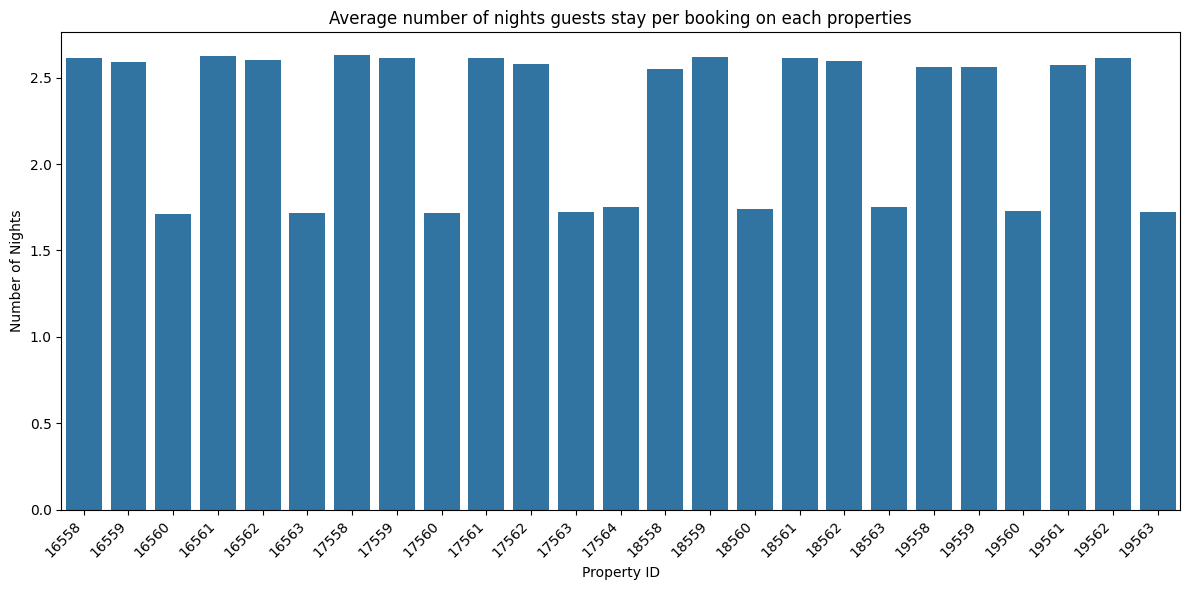

In [176]:
plt.figure(figsize=(12, 6))
sns.barplot(data=prop_id4, x='property_id', y='Avg_night_stay')
plt.xticks(rotation=45, ha='right')
plt.title('Average number of nights guests stay per booking on each properties')
plt.xlabel('Property ID')
plt.ylabel('Number of Nights')
plt.tight_layout()
plt.show()

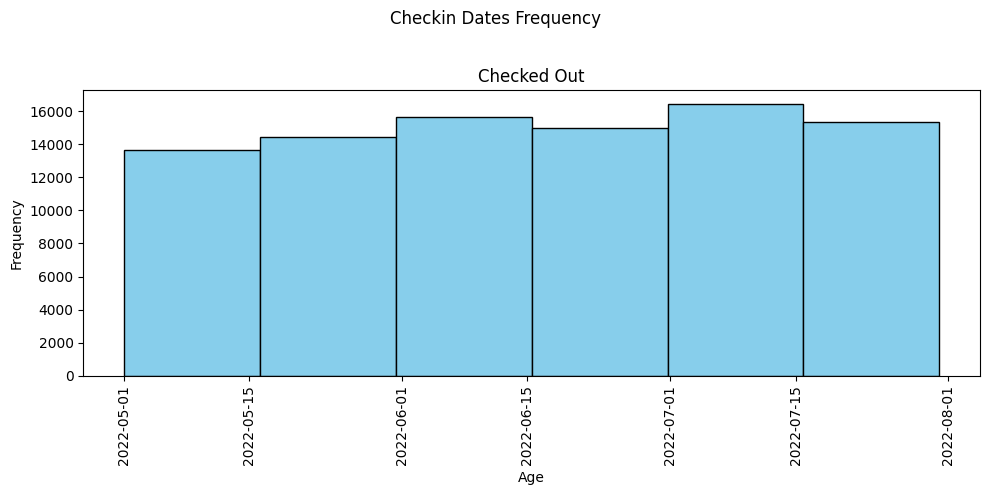

In [220]:
checkedout_df = df[df['booking_status'] == 'Checked Out'].reset_index()

checkedout_df.hist(column='check_in_date', by='booking_status', bins=6, color='skyblue', edgecolor='black', figsize=(10,5))
plt.suptitle('Checkin Dates Frequency')  
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()
